## Problem Statement:



### You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose,you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’,you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised.

## Import all required Libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from warnings import filterwarnings
filterwarnings("ignore")

### 1.1&2 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (5 pts). Interpret the inferences for each (3 pts)

## Load the Data

In [2]:
df=pd.read_csv("Transport.csv")

## EDA

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,18,Male,1,0,0,6.8,12.2,0,Public Transport
1,18,Male,0,0,0,6.7,13.0,0,Private Transport
2,19,Female,1,0,1,7.5,8.1,0,Public Transport
3,20,Male,1,0,2,8.5,7.0,0,Public Transport
4,20,Female,0,1,1,8.5,7.9,0,Public Transport


### Shape

In [4]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  444 
no. of columns:  9


### Data type of data features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


### Check for missing value in any column

In [6]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

### Making different list for categorical columns and numerical columns

In [7]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Gender', 'Transport']
['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license']


In [8]:
for variable in df:
    print(variable,":", sum(df[variable] == '?'))

Age : 0
Gender : 0
Engineer : 0
MBA : 0
Work Exp : 0
Salary : 0
Distance : 0
license : 0
Transport : 0


In [9]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

Gender : 0
Transport : 0


## Data Preprocessing

we need some summary statistics of our dataframe. For this, we can use describe() method. It can be used to generate various summary statistics.

### Describe for numerical and categorical columns

In [10]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


In [11]:
df[cat].describe().T

,count,unique,top,freq
Gender,444,2,Male,316
Transport,444,2,Public Transport,300


In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,444.0,NaN,NaN,NaN,27.747748,4.41671,18.0,25.0,27.0,30.0,43.0
Gender,444,2,Male,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,444.0,NaN,NaN,NaN,0.754505,0.430866,0.0,1.0,1.0,1.0,1.0
MBA,444.0,NaN,NaN,NaN,0.252252,0.434795,0.0,0.0,0.0,1.0,1.0
Work Exp,444.0,NaN,NaN,NaN,6.29955,5.112098,0.0,3.0,5.0,8.0,24.0
Salary,444.0,NaN,NaN,NaN,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,NaN,NaN,NaN,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,NaN,NaN,NaN,0.234234,0.423997,0.0,0.0,0.0,0.0,1.0
Transport,444,2,Public Transport,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for duplicate data

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport


In [18]:
df.skew()

Age         0.955276
Engineer   -1.186708
MBA         1.144763
Work Exp    1.352840
Salary      2.044533
Distance    0.539851
license     1.259293
dtype: float64

## Get unique counts of all Nominal Variables

In [14]:
for column in df[['Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license', 'Transport']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

GENDER :  2
Female    128
Male      316
Name: Gender, dtype: int64


ENGINEER :  2
0    109
1    335
Name: Engineer, dtype: int64


MBA :  2
1    112
0    332
Name: MBA, dtype: int64


WORK EXP :  24
24     1
17     2
15     2
22     3
13     3
16     5
12     5
18     5
20     6
21     6
14     8
19    10
11    11
10    14
9     21
1     22
7     28
8     28
0     29
5     42
6     46
3     46
2     47
4     54
Name: Work Exp, dtype: int64


SALARY :  122
52.0     1
9.7      1
35.0     1
30.9     1
22.7     1
        ..
14.9    11
12.8    12
13.6    12
8.5     13
14.6    22
Name: Salary, Length: 122, dtype: int64


DISTANCE :  137
20.8     1
19.8     1
16.9     1
18.2     1
18.3     1
        ..
10.7     7
11.7     8
9.0      9
8.1     11
12.2    12
Name: Distance, Length: 137, dtype: int64


LICENSE :  2
1    104
0    340
Name: license, dtype: int64


TRANSPORT :  2
Private Transport    144
Public Transport     300
Name: Transport, dtype: int64




### Univariate Analysis

In [15]:
df.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license', 'Transport'],
      dtype='object')

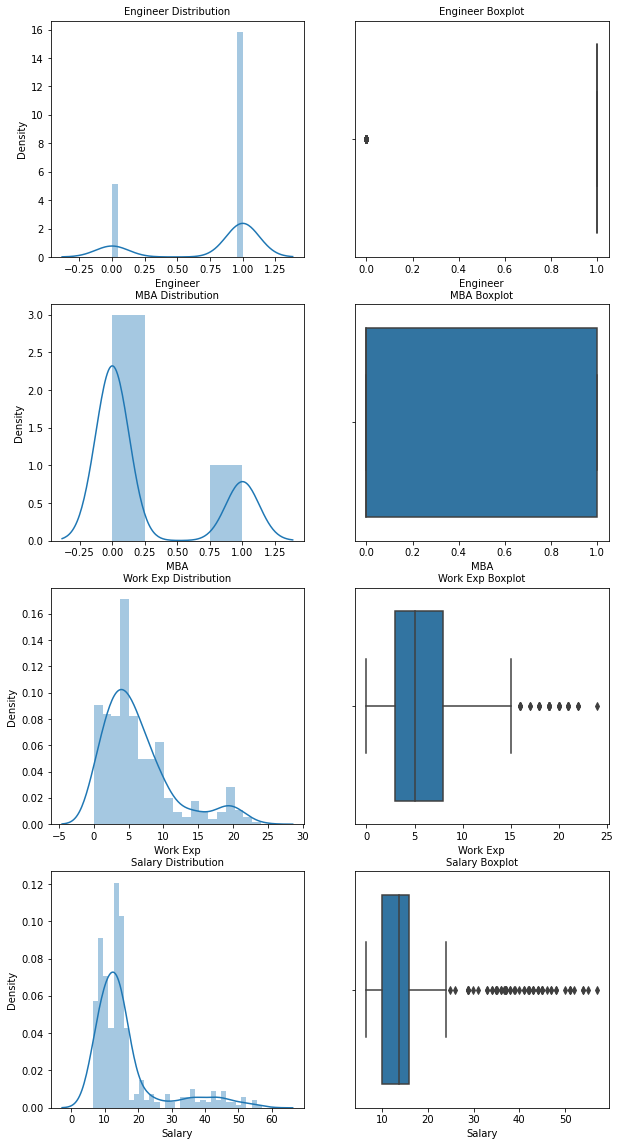

In [16]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)


a = sns.distplot(df['Engineer'] , ax=axes[0][0])
a.set_title("Engineer Distribution",fontsize=10)

a = sns.boxplot(df['Engineer'] , orient = "v" , ax=axes[0][1])
a.set_title("Engineer Boxplot",fontsize=10)


a = sns.distplot(df['MBA'] , ax=axes[1][0])
a.set_title("MBA Distribution",fontsize=10)

a = sns.boxplot(df['MBA'] , orient = "v" , ax=axes[1][1])
a.set_title("MBA Boxplot",fontsize=10)


a = sns.distplot(df['Work Exp'] , ax=axes[2][0])
a.set_title("Work Exp Distribution",fontsize=10)

a = sns.boxplot(df['Work Exp'] , orient = "v" , ax=axes[2][1])
a.set_title("Work Exp Boxplot",fontsize=10)


a = sns.distplot(df['Salary'] , ax=axes[3][0])
a.set_title("Salary Distribution",fontsize=10)

a = sns.boxplot(df['Salary'] , orient = "v" , ax=axes[3][1])
a.set_title("Salary Boxplot",fontsize=10)


plt.show()

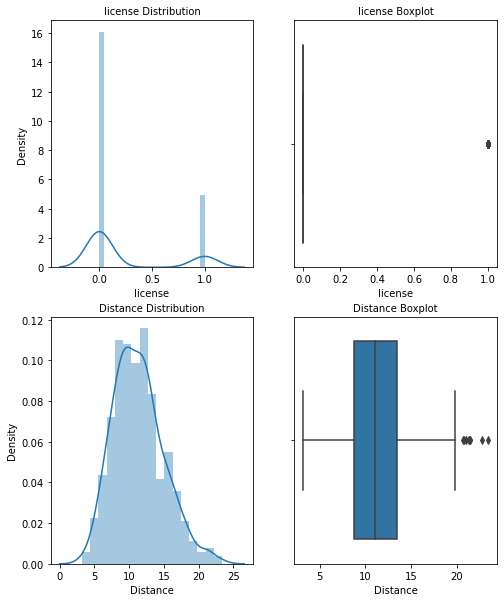

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(8,10)

a = sns.distplot(df['license'] , ax=axes[0][0])
a.set_title("license Distribution",fontsize=10)

a = sns.boxplot(df['license'] , orient = "v" , ax=axes[0][1])
a.set_title("license Boxplot",fontsize=10)

a = sns.distplot(df['Distance'] , ax=axes[1][0])
a.set_title("Distance Distribution",fontsize=10)

a = sns.boxplot(df['Distance'] , orient = "v" , ax=axes[1][1])
a.set_title("Distance Boxplot",fontsize=10)

plt.show()

## Bivariate and Multivariate Analysis

## Make count plots for categorical columns

Categories present in Gender-


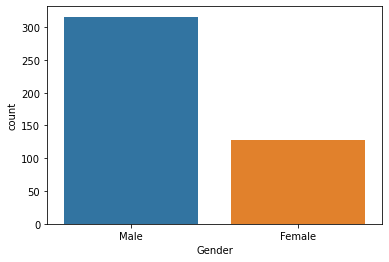

Categories present in Transport-


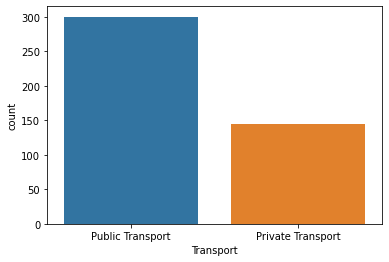

Male      0.711712
Female    0.288288
Name: Gender, dtype: float64
Public Transport     0.675676
Private Transport    0.324324
Name: Transport, dtype: float64


In [19]:
# Making countplots- 
for feature in df.columns: 
    if df[feature].dtype == 'object':  
        print('Categories present in {}-'.format(feature))
        sns.countplot(df[feature])
        plt.show()
print(df.Gender.value_counts(normalize=True))

print(df.Transport.value_counts(normalize=True))

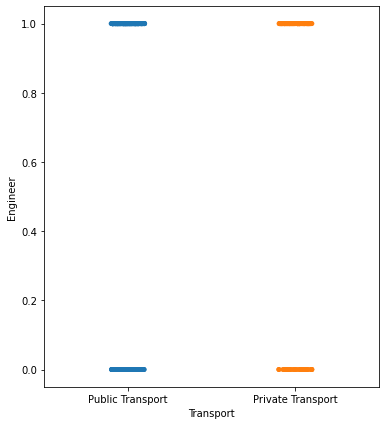

In [20]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['Engineer'], jitter=True) 
plt.show()

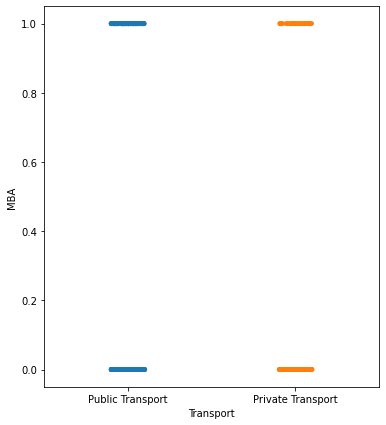

In [21]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['MBA'], jitter=True) 
plt.show()

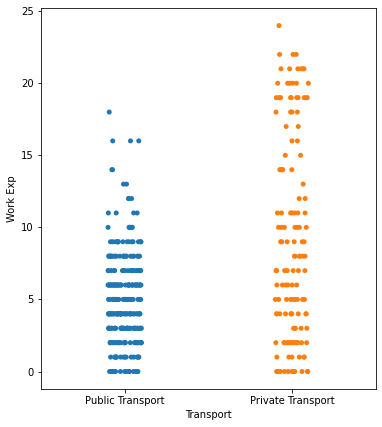

In [22]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['Work Exp'], jitter=True) 
plt.show()

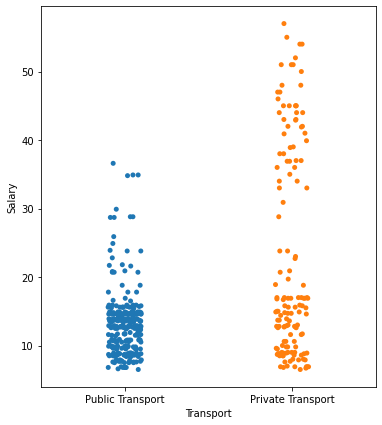

In [23]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['Salary'], jitter=True) 
plt.show()

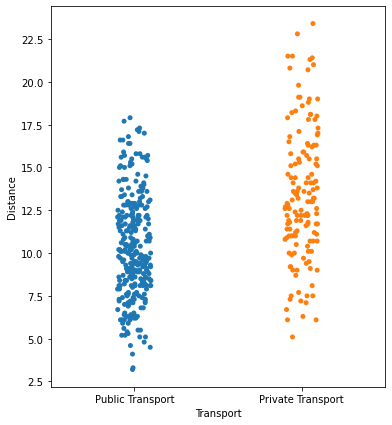

In [24]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['Distance'], jitter=True) 
plt.show()

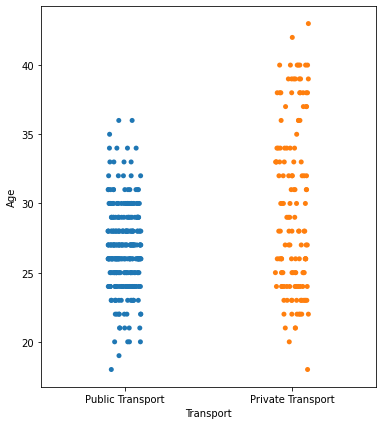

In [25]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Transport"], df['Age'], jitter=True) 
plt.show()

## Check pairwise distribution of the continuous variables(pair plot for continues column)

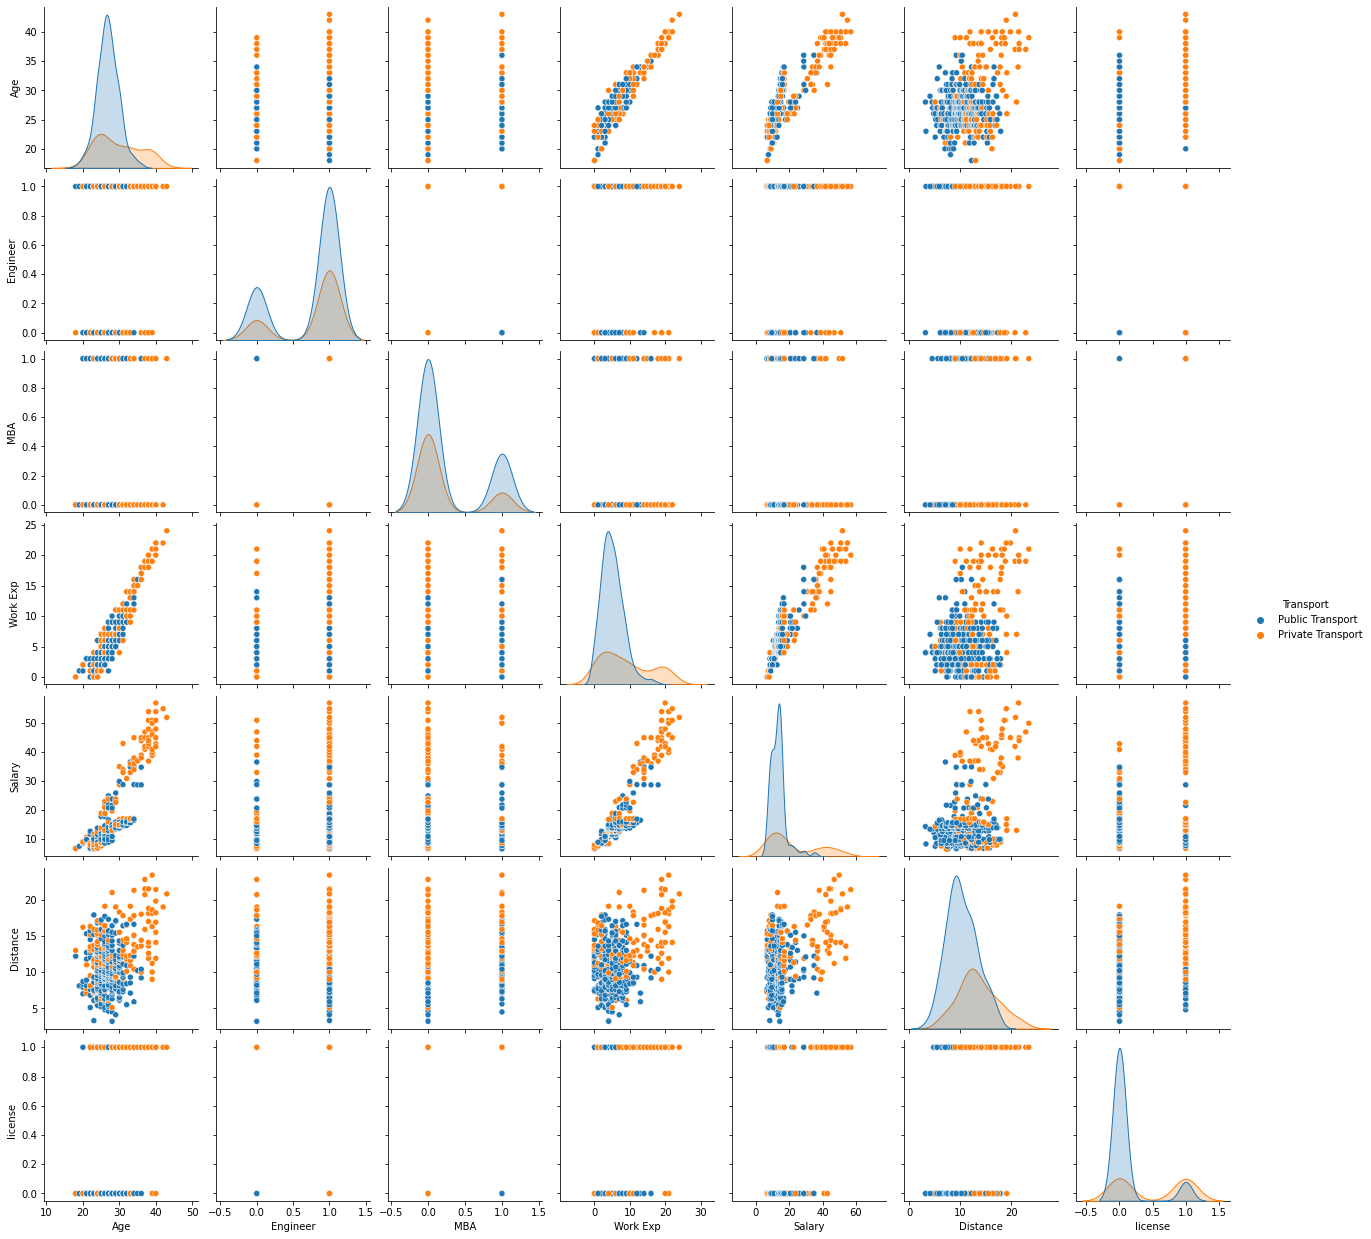

In [26]:
sns.pairplot(df, hue="Transport")

## Check for Correlation

(Make a Heat map)

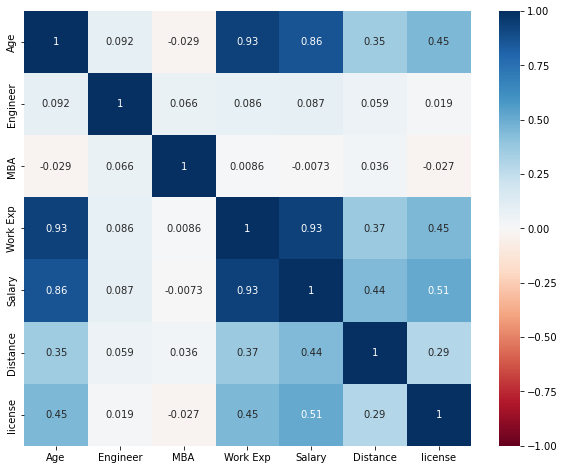

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,vmin=-1,cmap='RdBu')
plt.show()

There are mostly positive correlations between variables, and very few negative correlations.

Overall the magnitude of correlations between the variables are very less.

## Check for Outliers

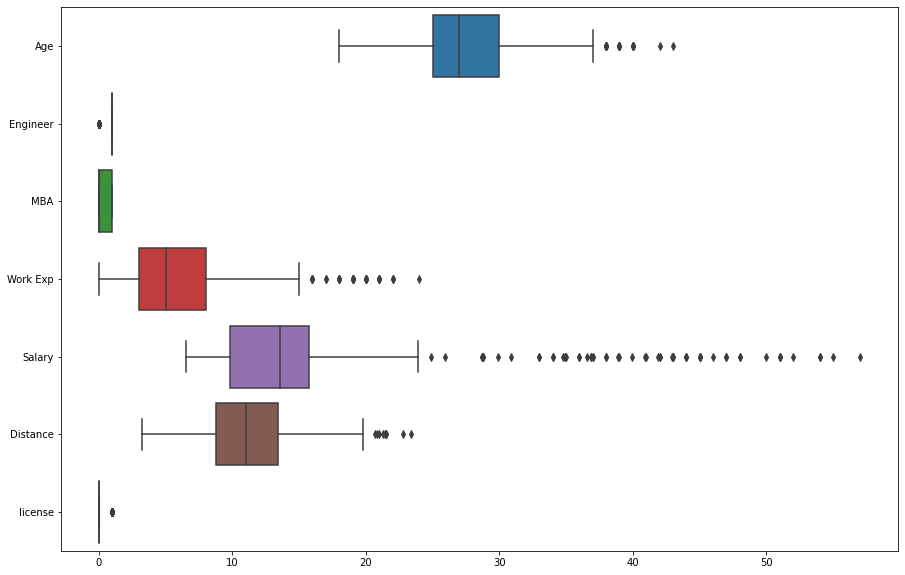

In [28]:
# construct box plot for continuous variables
plt.figure(figsize=(15,10))
sns.boxplot(data=df,orient="h")
plt.show()

In [29]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
Age,5.63
Distance,2.03
Engineer,24.55
Gender,0.00
MBA,0.00
Salary,13.29
Transport,0.00
Work Exp,8.56
license,23.42


There are outliers in all the variables. Ensemble techniques can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is.


In [30]:
df['Distance'] = df['Distance'].astype('int64')
df['Engineer'] = df['Engineer'].astype('int64')
df['MBA'] = df['MBA'].astype('int64')
df['Salary'] = df['Salary'].astype('int64')
df['Work Exp'] = df['Work Exp'].astype('int64')
df['license'] = df['license'].astype('int64')

In [31]:
display(df.dtypes)

Age           int64
Gender       object
Engineer      int64
MBA           int64
Work Exp      int64
Salary        int64
Distance      int64
license       int64
Transport    object
dtype: object

## 1.3) Encode the data (having string values) for Modelling(2 pts). Is Scaling necessary here or not?(2 pts), Data Split: Split the data into train and test (70:30) 

### Convert all objects to categorical codes

In [32]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[1 0]


feature: Transport
['Public Transport', 'Private Transport']
Categories (2, object): ['Private Transport', 'Public Transport']
[1 0]


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        444 non-null    int64
 1   Gender     444 non-null    int8 
 2   Engineer   444 non-null    int64
 3   MBA        444 non-null    int64
 4   Work Exp   444 non-null    int64
 5   Salary     444 non-null    int64
 6   Distance   444 non-null    int64
 7   license    444 non-null    int64
 8   Transport  444 non-null    int8 
dtypes: int64(7), int8(2)
memory usage: 25.3 KB


In [34]:
# Converting int8 to int64 variables
df['Transport'] = df['Transport'].astype('int64')
df['Gender'] = df['Gender'].astype('int64')

In [35]:
df.Transport.value_counts(normalize=True)

1    0.675676
0    0.324324
Name: Transport, dtype: float64

In [36]:
df1 = df.copy()
df1.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,18,1,1,0,0,6,12,0,1
1,18,1,0,0,0,6,13,0,0
2,19,0,1,0,1,7,8,0,1
3,20,1,1,0,2,8,7,0,1
4,20,0,0,1,1,8,7,0,1


## Extract the target column into separate vectors for training set and test set

In [37]:
X = df.drop("Transport", axis=1)

y = df.pop("Transport")

X.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,18,1,1,0,0,6,12,0
1,18,1,0,0,0,6,13,0
2,19,0,1,0,1,7,8,0
3,20,1,1,0,2,8,7,0
4,20,0,0,1,1,8,7,0


## Split data into training and test set

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Check the dimensions of the training and test data

In [39]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (310, 8)
The training set for the dependent variable: (310,)
The test set for the independent variables: (134, 8)
The test set for the dependent variable: (134,)


In [40]:
#spilting the dataset into train and test set to build Logistic regression and LDA model (70:30)
# X_train :70% of data randomly chosen from the 8 columns .These are training independent variables
# X_test :30% of data randomly chosen from the 8 columns .These are test independent variables
# y_train :70% of data randomly chosen from the "Transport" column .These are training dependent variables
# y_test :30% of data randomly chosen from the "Transport" columns.These are test ndependent variables

## Scaling

We need to do scaling before using distance based models. Standard Scaling , or Min-Max scaling either one of these can used.

In [41]:
X_train.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
201,27,1,1,0,4,13,4,0
386,33,1,1,0,11,15,8,0
329,30,0,1,0,8,14,8,0
249,27,0,0,0,4,13,17,0
349,30,1,1,0,9,14,13,0


In [42]:
sc=StandardScaler()

In [43]:
X_train_sc= pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

## 1.4) Apply Logistic Regression(4 pts). Interpret the inferences of both models 

In [44]:
# Fit the Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [45]:
#We now fit our model to the logistic regression model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.

### Predicting on Training and Test dataset

In [46]:
ytrain_predict = model1.predict(X_train)
ytest_predict = model1.predict(X_test)

### Getting the Predicted Classes and Probs

In [47]:
ytest_predict_prob=model1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.293619,0.706381
1,0.324846,0.675154
2,0.473880,0.526120
3,0.147178,0.852822
4,0.091220,0.908780


### Model Evaluation

In [48]:
# Accuracy - Training Data
model1.score(X_train, y_train)

0.7774193548387097

In [49]:
model1.score(X_test, y_test)

0.8432835820895522

## Applying GridSearchCV for Logistic Regression

In [50]:
grid={'penalty':['l2'],
      'solver':['saga'],
      'max_iter':[1000,100],
      'tol':[0.00001,0.001]
     }

In [51]:
model2 = LogisticRegression()

In [52]:
grid_search = GridSearchCV(estimator = model2, param_grid = grid, cv = 7,n_jobs=-1,scoring='accuracy')


In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [1000, 100], 'penalty': ['l2'],
                         'solver': ['saga'], 'tol': [1e-05, 0.001]},
             scoring='accuracy')

In [54]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001} 

LogisticRegression(max_iter=1000, solver='saga', tol=0.001)


In [55]:
best_model = grid_search.best_estimator_

## Prediction on the training and test set

In [56]:
ytrain_predictlr1 = best_model.predict(X_train)
ytest_predictlr1 = best_model.predict(X_test)

In [57]:
# The probabilities on the test set

In [58]:
ytrain_predict_prob1=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob1).head()

,0,1
0,0.064543,0.935457
1,0.083546,0.916454
2,0.191808,0.808192
3,0.616982,0.383018
4,0.241931,0.758069


In [59]:
ytest_predict_prob1=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.314812,0.685188
1,0.325217,0.674783
2,0.451891,0.548109
3,0.117429,0.882571
4,0.116503,0.883497


In [60]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train= best_model.score(X_train, y_train)
accuracy_lr_train

0.7838709677419354

In [61]:
accuracy_lr_test= best_model.score(X_test, y_test)
accuracy_lr_test

0.8582089552238806

In [62]:
#Finding the Intercept of the Final Model 
print("The intercept for the model is :",best_model.intercept_)

The intercept for the model is : [-0.00909936]


In [63]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[0][idx]))

The coefficient for Age is 0.15241588752991486
The coefficient for Gender is 0.6958147556539097
The coefficient for Engineer is -0.03373938144325787
The coefficient for MBA is 0.18794764099512393
The coefficient for Work Exp is -0.03492532054848855
The coefficient for Salary is -0.09147268868520589
The coefficient for Distance is -0.19141409875583448
The coefficient for license is -1.0199648810909432


Feature: 0, Score: 0.15242
Feature: 1, Score: 0.69581
Feature: 2, Score: -0.03374
Feature: 3, Score: 0.18795
Feature: 4, Score: -0.03493
Feature: 5, Score: -0.09147
Feature: 6, Score: -0.19141
Feature: 7, Score: -1.01996


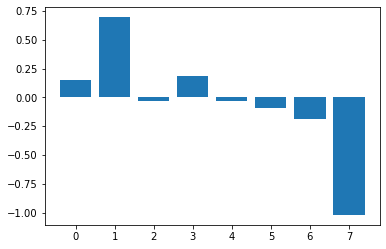

In [64]:
#Feature Importance Graphs
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Using GridsearchCV, we input various parameters like 'max_iter', 'penalty',solver', 'tol' which will helps us to find best grid for prediction of the better model
#max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.
#solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
#penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.
#bestgrid:{'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 1e-05}
#Accuracy score of training data:83.5%
#Accuracy score of test data:83.5%

In [65]:
#concatenate X(independent) and y (variables) into a single dataframe for logistic regression statsmodel


In [66]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
201,27,1,1,0,4,13,4,0,1
386,33,1,1,0,11,15,8,0,1
329,30,0,1,0,8,14,8,0,1
249,27,0,0,0,4,13,17,0,1
349,30,1,1,0,9,14,13,0,1


In [67]:
#Statsmodels is a Python module which provides various functions for estimating different statistical models and performing statistical tests
#first, we define the set of dependent(y) and independent(X) variables.  If the dependent variable is in non-numeric form, it is first converted to numeric using encoding
import statsmodels.api as SM

In [68]:
f1 = SM.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.480952
         Iterations 6


In [69]:
f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  310
Model:                          Logit   Df Residuals:                      302
Method:                           MLE   Df Model:                            7
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                  0.2462
Time:                        13:36:26   Log-Likelihood:                -149.10
converged:                       True   LL-Null:                       -197.78
Covariance Type:            nonrobust   LLR p-value:                 3.771e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.1517      0.026      5.846      0.000       0.101       0.203
Gender         1.0898      0.326      3.342      0.001       0.451       1.729
Engineer      -0.1037      0.332     -0.312      0.755      -0.755       0.548
MBA            0.1393      0.344      0.405      0.685      -0.534       0.813
Work Exp      -0.0410      0.082     -0.503      0.615      -0.201       0.119
Salary        -0.0800      0.044     -1.813      0.070      -0.167       0.006
Distance      -0.2049      0.046     -4.448      0.000      -0.295      -0.115
license       -1.6781      0.386     -4.346      0.000      -2.435      -0.921
==============================================================================
"""

### LDA

#Linear Discriminant Analysis(LDA) is a dimensionality reduction technique which is commonly used for the supervised classification problems.

#It is used for modeling differences in groups i.e. separating two or more classes. It is used to project the features in higher dimension space into a lower dimension space.

#library used in LDA is sklearn


In [73]:
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train,y_train)

### Prediction

In [74]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_lda = model_lda.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_lda = model_lda.predict(X_test)

In [75]:
ytrain_predict_problda1=model_lda.predict_proba(X_train)
pd.DataFrame(ytrain_predict_problda1).head()

,0,1
0,0.032931,0.967069
1,0.047642,0.952358
2,0.173447,0.826553
3,0.568737,0.431263
4,0.167712,0.832288


In [76]:
ytest_predict_problda1=model_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_problda1).head()

,0,1
0,0.233293,0.766707
1,0.282662,0.717338
2,0.447156,0.552844
3,0.142922,0.857078
4,0.061066,0.938934


In [77]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lda_train= model_lda.score(X_train, y_train)
accuracy_lda_train

0.7806451612903226

In [78]:
accuracy_lda_test= model_lda.score(X_test, y_test)
accuracy_lda_test

0.8507462686567164

### GRIDSEARCHCV

In [79]:
grid_lda={
      'solver':['svd', 'lsqr', 'eigen'],
      
     }

In [80]:
model_lda = LinearDiscriminantAnalysis()

In [81]:
grid_search_lda = GridSearchCV(estimator = model_lda, param_grid = grid_lda, cv = 7,n_jobs=-1,scoring='accuracy')


In [82]:
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [83]:
print(grid_search_lda.best_params_,'\n')
print(grid_search_lda.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [84]:
best_model_lda = grid_search_lda.best_estimator_


In [85]:
ytrain_predictlda = best_model_lda.predict(X_train)
ytest_predictlda = best_model_lda.predict(X_test)

In [86]:
# Training Data Class Prediction with a cut-off value of 0.5
# Test Data Class Prediction with a cut-off value of 0.5

In [87]:
ytrain_predictlda


array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [88]:
ytrain_predict_problda=best_model_lda.predict_proba(X_train)
pd.DataFrame(ytrain_predict_problda).head()

,0,1
0,0.032931,0.967069
1,0.047642,0.952358
2,0.173447,0.826553
3,0.568737,0.431263
4,0.167712,0.832288


In [89]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lda_train= best_model_lda.score(X_train, y_train)
accuracy_lda_train

0.7806451612903226

In [90]:
accuracy_lda_test= best_model_lda.score(X_test, y_test)
accuracy_lda_test

0.8507462686567164

## 1.5) Apply KNN Model(4 pts). Interpret the inferences of each model

In [92]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors = 15)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [93]:
Y_train_predict = KNN_model.predict(X_train_sc)
Y_test_predict = KNN_model.predict(X_test_sc)

In [94]:
KNN_model.score(X_train,y_train)


0.8064516129032258

In [95]:
KNN_model.score(X_test,y_test)


0.8134328358208955

In [96]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.19402985074626866,
 0.19402985074626866,
 0.20895522388059706,
 0.22388059701492535,
 0.19402985074626866,
 0.19402985074626866,
 0.19402985074626866,
 0.18656716417910446,
 0.20149253731343286,
 0.19402985074626866]

## Plot misclassification error vs k (with k value on X-axis) using matplotlib

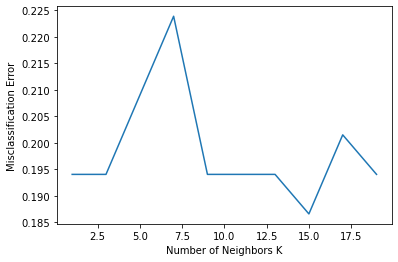

In [97]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [123]:
## Performance Matrix on train data set
y_train_predict_knn = KNN_model.predict(X_train)
acc_train_knn = KNN_model.score(X_train, y_train)
print(acc_train_knn)
print(confusion_matrix(y_train, y_train_predict_knn))
print(classification_report(y_train, y_train_predict_knn))

0.8064516129032258
[[ 57  47]
 [ 13 193]]
              precision    recall  f1-score   support

           0       0.81      0.55      0.66       104
           1       0.80      0.94      0.87       206

    accuracy                           0.81       310
   macro avg       0.81      0.74      0.76       310
weighted avg       0.81      0.81      0.79       310



In [124]:
## Performance Matrix on test data set
y_test_predict_knn = KNN_model.predict(X_test)
acc_test_knn = KNN_model.score(X_test, y_test)
print(acc_test_knn)
print(confusion_matrix(y_test, y_test_predict_knn))
print(classification_report(y_test, y_test_predict_knn))

0.8134328358208955
[[21 19]
 [ 6 88]]
              precision    recall  f1-score   support

           0       0.78      0.53      0.63        40
           1       0.82      0.94      0.88        94

    accuracy                           0.81       134
   macro avg       0.80      0.73      0.75       134
weighted avg       0.81      0.81      0.80       134



In [125]:
ytrain_predict_prob_knn=KNN_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_knn).head()

,0,1
0,0.133333,0.866667
1,0.333333,0.666667
2,0.066667,0.933333
3,0.133333,0.866667
4,0.333333,0.666667


In [126]:
ytest_predict_prob_knn=KNN_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_knn).head()

,0,1
0,0.000000,1.000000
1,0.400000,0.600000
2,0.133333,0.866667
3,0.266667,0.733333
4,0.066667,0.933333


In [127]:
# The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.
# n_neighbors = 15
#Accuracy score of training data:80.6%
#Accuracy score of test data:81.3%

In [128]:
# N_neighbors (K)
# Simply put, K is the number of neighbors that defines an unlabeled datapoint’s classification boundary.
# K takes in a range of integers (default = 5), finds the K-nearest neighbors, calculates the distance from each unlabeled point to those K-neighbors. How distance is calculated is defined by the metrics parameter explained below.


## KNN with gridsearchcv

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
grid_knn={'n_neighbors':[ 5,7,10,15],
      'weights': ['uniform','distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']      
      }

In [131]:
model_knn = KNeighborsClassifier()

In [132]:
grid_search_knn = GridSearchCV(estimator = model_knn, param_grid = grid_knn,n_jobs=-1, cv = 7,scoring='accuracy')

In [133]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [134]:
print(grid_search_knn.best_params_,'\n')

{'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'distance'} 



In [135]:
print(grid_search_knn.best_estimator_)

KNeighborsClassifier(algorithm='brute', n_neighbors=10, weights='distance')


In [136]:
grid_search_knn.score(X_train,y_train)


0.9967741935483871

In [137]:
grid_search_knn.score(X_test,y_test)

0.8059701492537313

#Leaf_size determines how many observations are captured in each leaf of either the BallTree of KDTree algorithms, which ultimately make the classification. 
#Weights is the function that weights the data when making a prediction. “Uniform” is an equal weighted function, while “distance” weights the points by the inverse of their distance
#Metric can be set to various distance metrics like Manhattan, Euclidean, Minkowski, or weighted Minkowski (default is “minkowski” with a p=2, which is the Euclidean distance). 
 

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [138]:
# Tuning is the process of maximizing a model’s performance without overfitting or creating too high of a variance. In machine learning, this is accomplished by selecting appropriate “hyperparameters.”

# Hyperparameters can be thought of as the “dials” or “knobs” of a machine learning model. Choosing an appropriate set of hyperparameters is crucial for model accuracy, but can be computationally challenging. Hyperparameters differ from other model parameters in that they are not learned by the model automatically through training methods. Instead, these parameters must be set manually. Many methods exist for selecting appropriate hyperparameters. 


In [139]:
# Grid Search
# Grid Search, also known as parameter sweeping, is one of the most basic and traditional methods of hyperparametric optimization. This method involves manually defining a subset of the hyperparametric space and exhausting all combinations of the specified hyperparameter subsets. Each combination’s performance is then evaluated, typically using cross-validation, and the best performing hyperparametric combination is chosen.


### Bagging with randomforest

#A Bagging classifier.

#A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., RandomForest), by introducing randomization into its construction procedure and then making an ensemble out of it.

#Bagging and random forests are “bagging” algorithms that aim to reduce the complexity of models that overfit the training data. 

In [140]:
model_rf=RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=101)
model_bag=BaggingClassifier(base_estimator=model_rf,n_estimators=101,random_state=1)
model_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                        max_features=5,
                                                        min_samples_leaf=25,
                                                        min_samples_split=50,
                                                        n_estimators=101),
                  n_estimators=101, random_state=1)

In [141]:
# Bagging (Random Forest should be applied for Bagging)

In [142]:
y_train_predict_bag = model_bag.predict(X_train)


In [143]:
y_test_predict_bag = model_bag.predict(X_test)

In [144]:
acc_bag_train =model_bag.score(X_train, y_train)
acc_bag_train

0.7709677419354839

In [145]:
acc_bag_test =model_bag.score(X_test, y_test)
acc_bag_test

0.835820895522388

In [146]:
ytrain_predict_prob_bag=model_bag.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_bag).head()

,0,1
0,0.115405,0.884595
1,0.311753,0.688247
2,0.173228,0.826772
3,0.295061,0.704939
4,0.331104,0.668896


In [147]:
ytest_predict_prob_bag=model_bag.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_bag).head()

,0,1
0,0.257569,0.742431
1,0.273913,0.726087
2,0.291294,0.708706
3,0.299722,0.700278
4,0.134457,0.865543


In [148]:
# set the hyper parameters in randomforest classifier
# N_estimators (only used in Random Forests) is the number of decision trees used in making the forest (default = 100). 
# Max_depth is an integer that sets the maximum depth of the tree. The default is None, which means the nodes are expanded until all the leaves are pure 
# Min_samples_split is the minimum number of samples required to split an internal node. 
# Min_samples_leaf defines the minimum number of samples needed at each leaf. The default input here is 1.

#We now fit randomforest classifier model to the bagging model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.
#Accuracy score of training data:77.09%
#Accuracy score of test data:83.5%

## AdaBoostClassifier

In [149]:
#  Boosting is an ensemble strategy thats consecutively builds on weak learners in order to generate one final strong learner. A weak learner is a model that may not be very accurate or may not take many predictors into account. By building a weak model, making conclusions about the various feature importances and parameters, and then using those conclusions to build a new, stronger model, Boosting can effectively convert weak learners into a strong learner.


In [150]:
# AdaBoost (Adaptive Boosting): AdaBoost uses decision stumps as weak learners. A Decision Stump is a Decision Tree model that only splits off at one level, ergo the final prediction is based off of only one feature. When AdaBoost makes its first Decision Stump, all observations are weighted evenly. 
# In an attempt to correct previous error, when moving to the second Decision Stump, the observations that were classified incorrectly now carry more weight than the observations that were correctly classified. AdaBoost continues this strategy until the best classification model is built.


In [151]:
from sklearn.ensemble import AdaBoostClassifier


ADa_model = AdaBoostClassifier(n_estimators=100,random_state=1, learning_rate=1.0, algorithm='SAMME.R')
ADa_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [152]:
y_train_predict_Ada = ADa_model.predict(X_train)


In [153]:
y_test_predict_Ada = ADa_model.predict(X_test)


In [154]:
ADa_train =ADa_model.score(X_train, y_train)
ADa_train

0.864516129032258

In [155]:
ADa_test=ADa_model.score(X_test, y_test)
ADa_test

0.7985074626865671

## GridSearchCV ADA boosting

In [156]:
grid_ADa={'n_estimators':[51,101,151],"learning_rate":[1.0,0.001,0.01,0.2,0.3], "algorithm":["SAMME.R"]}


In [157]:
model_ADa = AdaBoostClassifier()

In [158]:
grid_search_ADa = GridSearchCV(estimator = model_ADa, param_grid = grid_ADa, cv = 7,n_jobs=-1,scoring='accuracy')


In [159]:
grid_search_ADa.fit(X_train, y_train)


GridSearchCV(cv=7, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
                         'n_estimators': [51, 101, 151]},
             scoring='accuracy')

In [160]:
print(grid_search_ADa.best_params_,'\n')
print(grid_search_ADa.best_estimator_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.3, 'n_estimators': 151} 

AdaBoostClassifier(learning_rate=0.3, n_estimators=151)


In [161]:
best_model_ADa = grid_search_ADa.best_estimator_


In [162]:
ytrain_predict_ADa = best_model_ADa.predict(X_train)
ytest_predict_ADa = best_model_ADa.predict(X_test)

In [163]:
ytrain_predict_prob_ADa=best_model_ADa.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_ADa).head()

,0,1
0,0.425810,0.574190
1,0.488283,0.511717
2,0.480466,0.519534
3,0.494553,0.505447
4,0.486134,0.513866


In [164]:
ytest_predict_prob_ADa=best_model_ADa.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_ADa).head()

,0,1
0,0.485813,0.514187
1,0.489563,0.510437
2,0.493919,0.506081
3,0.443662,0.556338
4,0.482314,0.517686


In [165]:
# Accuracy - Training Data
# Training Accuracy
accuracy_ADa_train= best_model_ADa.score(X_train, y_train)
accuracy_ADa_train

0.8612903225806452

In [166]:
accuracy_ADa_test= best_model_ADa.score(X_test, y_test)
accuracy_ADa_test

0.8059701492537313

In [167]:
ytrain_predict_prob_ada=best_model_ADa.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_ada).head()

,0,1
0,0.425810,0.574190
1,0.488283,0.511717
2,0.480466,0.519534
3,0.494553,0.505447
4,0.486134,0.513866


In [168]:
ytrain_predict_prob_ada=best_model_ADa.predict_proba(X_test)
pd.DataFrame(ytrain_predict_prob_ada).head()

,0,1
0,0.485813,0.514187
1,0.489563,0.510437
2,0.493919,0.506081
3,0.443662,0.556338
4,0.482314,0.517686


## Gradient Boosting

In [169]:
# Gradient Boosting for classification
# GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.


In [170]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(criterion = 'friedman_mse',loss='exponential',max_features=5,
                                min_samples_split=50,n_estimators=101,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [171]:
y_train_predict_gbcl = gbcl.predict(X_train)


In [172]:
y_test_predict_gbcl = gbcl.predict(X_test)


In [173]:
gbcl.score(X_train, y_train)

0.9161290322580645

In [174]:
gbcl.score(X_test, y_test)

0.8208955223880597

In [175]:
grid_gbcl={"criterion" : ['friedman_mse',"mse"],"loss":['exponential'],"max_features":[5,6,7],
                                "min_samples_split":[50,40,30],"n_estimators":[101,51]}

In [176]:
model_gbcl = GradientBoostingClassifier()

In [177]:
grid_search_gbcl = GridSearchCV(estimator = model_gbcl, param_grid = grid_gbcl, cv = 7,n_jobs=-1,scoring='accuracy')


In [178]:
grid_search_gbcl.fit(X_train, y_train)


GridSearchCV(cv=7, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'loss': ['exponential'], 'max_features': [5, 6, 7],
                         'min_samples_split': [50, 40, 30],
                         'n_estimators': [101, 51]},
             scoring='accuracy')

In [179]:
print(grid_search_gbcl.best_params_,'\n')
print(grid_search_gbcl.best_estimator_)

{'criterion': 'mse', 'loss': 'exponential', 'max_features': 7, 'min_samples_split': 50, 'n_estimators': 101} 

GradientBoostingClassifier(criterion='mse', loss='exponential', max_features=7,
                           min_samples_split=50, n_estimators=101)


In [180]:
best_model_gbcl = grid_search_gbcl.best_estimator_

In [181]:
ytrain_predict_gbcl = best_model_gbcl.predict(X_train)
ytest_predict_gbcl = best_model_gbcl.predict(X_test)

In [182]:
ytrain_predict_prob_gbcl=best_model_gbcl.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_gbcl).head()

,0,1
0,0.069243,0.930757
1,0.044635,0.955365
2,0.011533,0.988467
3,0.168263,0.831737
4,0.019404,0.980596


In [183]:
ytest_predict_prob_gbcl=best_model_gbcl.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_gbcl).head()

,0,1
0,0.013990,0.986010
1,0.606889,0.393111
2,0.265357,0.734643
3,0.563574,0.436426
4,0.011334,0.988666


In [184]:
# Accuracy - Training Data
# Training Accuracy
accuracy_gbcl_train= best_model_gbcl.score(X_train, y_train)
accuracy_gbcl_train

0.9064516129032258

In [185]:
accuracy_gbcl_test= best_model_gbcl.score(X_test, y_test)
accuracy_gbcl_test

0.835820895522388

In [186]:
#Using GridsearchCV, we input various parameters like {'criterion', 'loss', 'max_features', 'min_samples_split', 'n_estimators}   which will helps us to find best grid for prediction of the better model
# best_params: {'criterion': 'friedman_mse', 'loss': 'exponential', 'max_features': 6, 'min_samples_split': 30, 'n_estimators': 51} 
#best_estimator:GradientBoostingClassifier(loss='exponential', max_features=6, min_samples_split=30, n_estimators=51)
#Accuracy score of training data:87.09%
#Accuracy score of test data:85.07%

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

In [187]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [188]:
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

### Confusion matrix on the training and test data


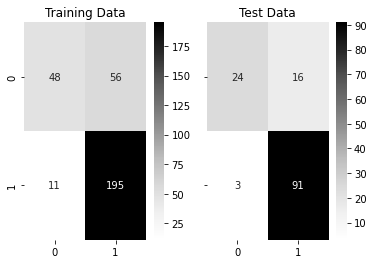

In [189]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predictlr1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predictlr1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [190]:
# Inference:
# Logistic regression
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 48 False Positive : 56
#False Negative : 11 True Positive : 195
#Test data:
#True Negative : 24 False Positive : 16
#False Negative : 3 True Positive : 91

## Classification Report of training and test data

In [191]:
print(classification_report(y_train, ytrain_predictlr1),'\n');
print(classification_report(y_test, ytest_predictlr1),'\n');

              precision    recall  f1-score   support

           0       0.81      0.46      0.59       104
           1       0.78      0.95      0.85       206

    accuracy                           0.78       310
   macro avg       0.80      0.70      0.72       310
weighted avg       0.79      0.78      0.76       310
 

              precision    recall  f1-score   support

           0       0.89      0.60      0.72        40
           1       0.85      0.97      0.91        94

    accuracy                           0.86       134
   macro avg       0.87      0.78      0.81       134
weighted avg       0.86      0.86      0.85       134
 



### AUC and ROC for the training data

AUC for the Training Data: 0.786
AUC for the Test Data: 0.909


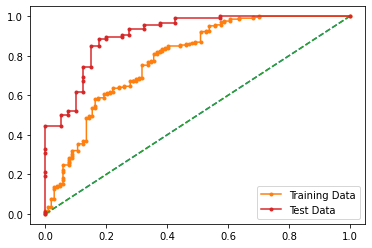

In [192]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr = metrics.roc_auc_score(y_train,ytrain_predict_prob1[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr = metrics.roc_auc_score(y_test,ytest_predict_prob1[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [193]:
metrics=classification_report(y_train, ytrain_predictlr1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lr=round(df.loc["1"][0],2)
train_recall_lr=round(df.loc["1"][1],2)
train_f1_lr=round(df.loc["1"][2],2)
print ('LR_train_precision ',train_precision_lr)
print ('LR_train_recall ',train_recall_lr)
print ('LR_train_f1 ',train_f1_lr)

LR_train_precision  0.78
LR_train_recall  0.95
LR_train_f1  0.85


In [194]:
metrics=classification_report(y_test, ytest_predictlr1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lr=round(df.loc["1"][0],2)
test_recall_lr=round(df.loc["1"][1],2)
test_f1_lr=round(df.loc["1"][2],2)
print ('LR_test_precision ',test_precision_lr)
print ('LR_test_recall ',test_recall_lr)
print ('LR_test_f1 ',test_f1_lr)

LR_test_precision  0.85
LR_test_recall  0.97
LR_test_f1  0.91


In [195]:
#Logistic regression
# Train Data:
### AUC: 78.6%
### Accuracy: 78%
### precision : 85%
#recall : 97%
#f1  :85%

# Test Data:
### AUC: 90.9%
### Accuracy: 86%
### precision: 85%
#recall : 97%
#f1 : 91%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting


### LinearDiscriminantAnalysis

In [196]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [197]:
metrics=classification_report(y_train,pred_class_train_lda,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lda=round(df.loc["1"][0],2)
train_recall_lda=round(df.loc["1"][1],2)
train_f1_lda=round(df.loc["1"][2],2)
print ('LDA_train_precision ',train_precision_lda)
print ('LDA_train_recall ',train_recall_lda)
print ('LDA_train_f1 ',train_f1_lda)

LDA_train_precision  0.78
LDA_train_recall  0.94
LDA_train_f1  0.85


In [198]:
metrics=classification_report(y_test,pred_class_test_lda,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lda=round(df.loc["1"][0],2)
test_recall_lda=round(df.loc["1"][1],2)
test_f1_lda=round(df.loc["1"][2],2)
print ('LDA_test_precision ',test_precision_lda)
print ('LDA_test_recall ',test_recall_lda)
print ('LDA_test_f1 ',test_f1_lda)

LDA_test_precision  0.86
LDA_test_recall  0.95
LDA_test_f1  0.9


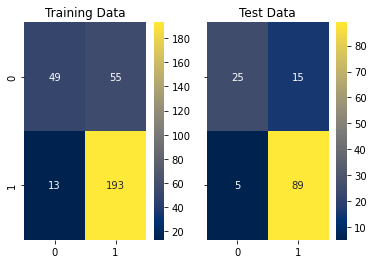

In [199]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,pred_class_train_lda)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,pred_class_test_lda)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [200]:
# Inference:
#LDA
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 49 False Positive : 55
#False Negative : 13 True Positive : 193
#Test data:
#True Negative : 25 False Positive : 15
#False Negative : 5 True Positive : 89

In [201]:
print(classification_report(y_train, pred_class_train_lda),'\n');
print(classification_report(y_test,pred_class_test_lda),'\n');

              precision    recall  f1-score   support

           0       0.79      0.47      0.59       104
           1       0.78      0.94      0.85       206

    accuracy                           0.78       310
   macro avg       0.78      0.70      0.72       310
weighted avg       0.78      0.78      0.76       310
 

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        40
           1       0.86      0.95      0.90        94

    accuracy                           0.85       134
   macro avg       0.84      0.79      0.81       134
weighted avg       0.85      0.85      0.84       134
 



AUC for the Training Data: 0.793
AUC for the Test Data: 0.911


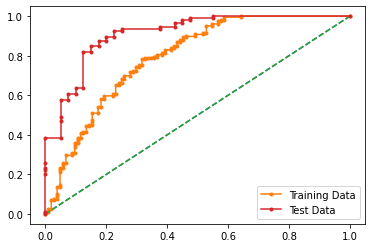

In [202]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lda  = roc_auc_score(y_train, ytrain_predict_problda[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, ytrain_predict_problda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lda = roc_auc_score(y_test,ytest_predict_problda1[:,1])
print('AUC for the Test Data: %.3f' % test_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,ytest_predict_problda1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [203]:
# Train Data:
### AUC: 79.3%
### Accuracy: 83%
### precision : 78%
#recall : 94%
#f1  :85%

# Test Data:
### AUC: 91.1%
### Accuracy: 83%
### precision :86%
#recall : 95%
#f1 : 90%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

### KNN Model

In [204]:
metrics=classification_report(y_train,y_train_predict_knn,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_knn=round(df.loc["1"][0],2)
train_recall_knn=round(df.loc["1"][1],2)
train_f1_knn=round(df.loc["1"][2],2)
print ('knn_train_precision ',train_precision_knn)
print ('knn_train_recall ',train_recall_knn)
print ('knn_train_f1 ',train_f1_knn)

knn_train_precision  0.8
knn_train_recall  0.94
knn_train_f1  0.87


In [205]:
metrics=classification_report(y_test,y_test_predict_knn,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_knn=round(df.loc["1"][0],2)
test_recall_knn=round(df.loc["1"][1],2)
test_f1_knn=round(df.loc["1"][2],2)
print ('knn_test_precision ',test_precision_knn)
print ('knn_test_recall ',test_recall_knn)
print ('knn_test_f1 ',test_f1_knn)

knn_test_precision  0.82
knn_test_recall  0.94
knn_test_f1  0.88


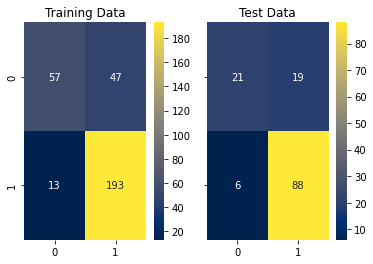

In [206]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_predict_knn)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,y_test_predict_knn)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [207]:
# Inference:
# KNN
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 57 False Positive : 47
#False Negative : 13 True Positive : 193
#Test data:
#True Negative : 21 False Positive : 19
#False Negative : 6 True Positive : 88

In [208]:
print(classification_report(y_train,y_train_predict_knn),'\n');
print(classification_report(y_test,y_test_predict_knn),'\n');

              precision    recall  f1-score   support

           0       0.81      0.55      0.66       104
           1       0.80      0.94      0.87       206

    accuracy                           0.81       310
   macro avg       0.81      0.74      0.76       310
weighted avg       0.81      0.81      0.79       310
 

              precision    recall  f1-score   support

           0       0.78      0.53      0.63        40
           1       0.82      0.94      0.88        94

    accuracy                           0.81       134
   macro avg       0.80      0.73      0.75       134
weighted avg       0.81      0.81      0.80       134
 



AUC for the Training Data: 0.837
AUC for the Test Data: 0.830


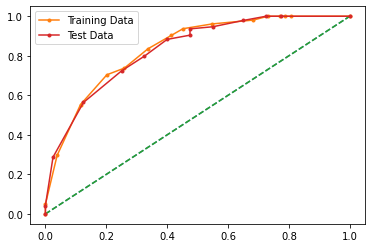

In [209]:
# AUC and ROC for the training data

# calculate AUC
train_auc_knn  = roc_auc_score(y_train, ytrain_predict_prob_knn[:,1])
print('AUC for the Training Data: %.3f' % train_auc_knn)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, ytrain_predict_prob_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_knn = roc_auc_score(y_test,ytest_predict_prob_knn[:,1])
print('AUC for the Test Data: %.3f' % test_auc_knn)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,ytest_predict_prob_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [210]:
# Train Data:
### AUC: 91%
### Accuracy: 85%
### precision : 88%
#recall : 92%
#f1  :89%

# Test Data:
### AUC: 89.3%
### Accuracy: 83%
### precision :85%
#recall : 90%
#f1 : 88%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

### Bagging with randomforest

In [211]:
metrics=classification_report(y_train,y_train_predict_bag,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_bag=round(df.loc["1"][0],2)
train_recall_bag=round(df.loc["1"][1],2)
train_f1_bag=round(df.loc["1"][2],2)
print ('bag_train_precision ',train_precision_bag)
print ('bag_train_recall ',train_recall_bag)
print ('bag_train_f1 ',train_f1_bag)

bag_train_precision  0.75
bag_train_recall  0.97
bag_train_f1  0.85


In [212]:
metrics=classification_report(y_test,y_test_predict_bag,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_bag=round(df.loc["1"][0],2)
test_recall_bag=round(df.loc["1"][1],2)
test_f1_bag=round(df.loc["1"][2],2)
print ('bag_test_precision ',test_precision_bag)
print ('bag_test_recall ',test_recall_bag)
print ('bag_test_f1 ',test_f1_bag)

bag_test_precision  0.82
bag_test_recall  0.98
bag_test_f1  0.89


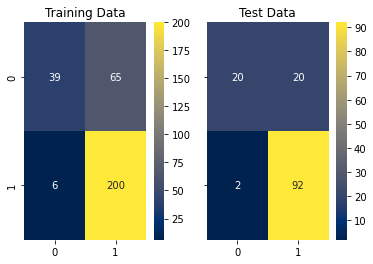

In [213]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_predict_bag)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,y_test_predict_bag)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [214]:
# Inference:
#BAGGING 
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 39 False Positive : 65
#False Negative : 6 True Positive : 200
#Test data:
#True Negative : 20 False Positive : 20
#False Negative : 2 True Positive : 92

In [215]:
print(classification_report(y_train,y_train_predict_bag),'\n');
print(classification_report(y_test,y_test_predict_bag),'\n');

              precision    recall  f1-score   support

           0       0.87      0.38      0.52       104
           1       0.75      0.97      0.85       206

    accuracy                           0.77       310
   macro avg       0.81      0.67      0.69       310
weighted avg       0.79      0.77      0.74       310
 

              precision    recall  f1-score   support

           0       0.91      0.50      0.65        40
           1       0.82      0.98      0.89        94

    accuracy                           0.84       134
   macro avg       0.87      0.74      0.77       134
weighted avg       0.85      0.84      0.82       134
 



AUC for the Training Data: 0.822
AUC for the Test Data: 0.870


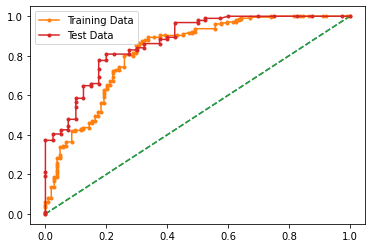

In [216]:
# AUC and ROC for the training data

# calculate AUC
train_auc_bag  = roc_auc_score(y_train, ytrain_predict_prob_bag[:,1])
print('AUC for the Training Data: %.3f' % train_auc_bag)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, ytrain_predict_prob_bag[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_bag = roc_auc_score(y_test,ytest_predict_prob_bag[:,1])
print('AUC for the Test Data: %.3f' % test_auc_bag)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,ytest_predict_prob_bag[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [217]:
# Train Data:
### AUC: 82.2%
### Accuracy: 77%
### precision : 75%
#recall : 97%
#f1  :85%

# Test Data:
### AUC: 87.0%
### Accuracy: 84%
### precision :82%
#recall : 98%
#f1 : 89%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

### AdaBoostClassifier

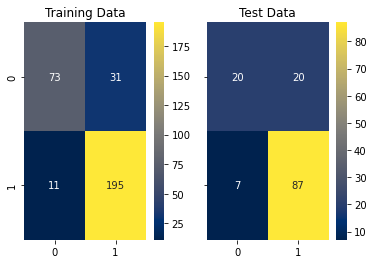

In [218]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,y_train_predict_Ada)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test, y_test_predict_Ada)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [219]:
# Inference:
# ADA BOOSTING 
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 73 False Positive : 31
#False Negative : 11 True Positive : 195
#Test data:
#True Negative : 20 False Positive : 20
#False Negative : 7 True Positive : 87

In [220]:
print(classification_report(y_train, y_train_predict_Ada),'\n');
print(classification_report(y_test, y_test_predict_Ada),'\n');

              precision    recall  f1-score   support

           0       0.87      0.70      0.78       104
           1       0.86      0.95      0.90       206

    accuracy                           0.86       310
   macro avg       0.87      0.82      0.84       310
weighted avg       0.86      0.86      0.86       310
 

              precision    recall  f1-score   support

           0       0.74      0.50      0.60        40
           1       0.81      0.93      0.87        94

    accuracy                           0.80       134
   macro avg       0.78      0.71      0.73       134
weighted avg       0.79      0.80      0.79       134
 



AUC for the Training Data: 0.906
AUC for the Test Data: 0.817


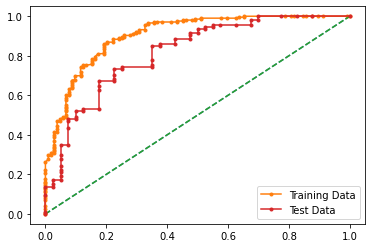

In [221]:
# AUC and ROC for the training data

# calculate AUC
train_auc_Ada = roc_auc_score(y_train,ytrain_predict_prob_ADa[:,1])
print('AUC for the Training Data: %.3f' % train_auc_Ada)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,ytrain_predict_prob_ADa[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_Ada = roc_auc_score(y_test,ytest_predict_prob_ADa[:,1])
print('AUC for the Test Data: %.3f' %test_auc_Ada)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,ytest_predict_prob_ADa[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [222]:
metrics=classification_report(y_train, y_train_predict_Ada,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_ADa=round(df.loc["1"][0],2)
train_recall_ADa=round(df.loc["1"][1],2)
train_f1_ADa=round(df.loc["1"][2],2)
print ('ADa_train_precision ',train_precision_ADa)
print ('ADa_train_recall ',train_recall_ADa)
print ('ADa_train_f1 ',train_f1_ADa)

ADa_train_precision  0.86
ADa_train_recall  0.95
ADa_train_f1  0.9


In [223]:
metrics=classification_report(y_test, y_test_predict_Ada,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_ADa=round(df.loc["1"][0],2)
test_recall_ADa=round(df.loc["1"][1],2)
test_f1_ADa=round(df.loc["1"][2],2)
print ('ADa_test_precision ',test_precision_ADa)
print ('ADa_test_recall ',test_recall_ADa)
print ('ADatest_f1 ',test_f1_ADa)

ADa_test_precision  0.81
ADa_test_recall  0.93
ADatest_f1  0.87


In [224]:
# Train Data:
### AUC: 90.6%
### Accuracy: 86%
### precision : 86%
#recall : 95%
#f1  :90%

# Test Data:
### AUC: 81.7%
### Accuracy: 80%
### precision :81%
#recall : 93%
#f1 : 87%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

### Gradient Boosting

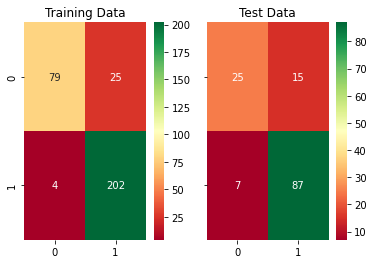

In [225]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train, ytrain_predict_gbcl)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test, ytest_predict_gbcl)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [226]:
# Inference:
# GRADIENT BOOSTING 
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 83 False Positive : 21
#False Negative : 2 True Positive : 204
#Test data:
#True Negative : 23 False Positive : 17
#False Negative : 9 True Positive : 85

In [227]:
print(classification_report(y_train, ytrain_predict_gbcl),'\n');
print(classification_report(y_test, ytest_predict_gbcl),'\n');

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       104
           1       0.89      0.98      0.93       206

    accuracy                           0.91       310
   macro avg       0.92      0.87      0.89       310
weighted avg       0.91      0.91      0.90       310
 

              precision    recall  f1-score   support

           0       0.78      0.62      0.69        40
           1       0.85      0.93      0.89        94

    accuracy                           0.84       134
   macro avg       0.82      0.78      0.79       134
weighted avg       0.83      0.84      0.83       134
 



AUC for the Training Data: 0.984
AUC for the Test Data: 0.895


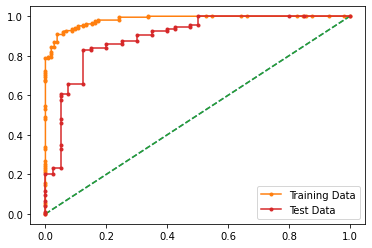

In [228]:
# AUC and ROC for the training data

# calculate AUC
train_auc_gbcl = roc_auc_score(y_train,ytrain_predict_prob_gbcl[:,1])
print('AUC for the Training Data: %.3f' % train_auc_gbcl)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,ytrain_predict_prob_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_gbcl = roc_auc_score(y_test,ytest_predict_prob_gbcl[:,1])
print('AUC for the Test Data: %.3f' %test_auc_gbcl)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,ytest_predict_prob_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [229]:
metrics=classification_report(y_train, ytrain_predict_gbcl,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_gbcl=round(df.loc["1"][0],2)
train_recall_gbcl=round(df.loc["1"][1],2)
train_f1_gbcl=round(df.loc["1"][2],2)
print ('gbcl_train_precision ',train_precision_gbcl)
print ('gbcl_train_recall ',train_recall_gbcl)
print ('gbcl_train_f1 ',train_f1_gbcl)

gbcl_train_precision  0.89
gbcl_train_recall  0.98
gbcl_train_f1  0.93


In [230]:
metrics=classification_report(y_test, ytest_predict_gbcl,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_gbcl=round(df.loc["1"][0],2)
test_recall_gbcl=round(df.loc["1"][1],2)
test_f1_gbcl=round(df.loc["1"][2],2)
print ('gbcl_test_precision ',test_precision_gbcl)
print ('gbcl_test_recall ',test_recall_gbcl)
print ('gbcl_test_f1 ',test_f1_gbcl)

gbcl_test_precision  0.85
gbcl_test_recall  0.93
gbcl_test_f1  0.89


In [231]:
# Train Data:
### AUC: 98.4%
### Accuracy: 93%
### precision : 89%
#recall : 98%
#f1  :93%

# Test Data:
### AUC: 89.5%
### Accuracy: 81%
### precision :85%
#recall : 93%
#f1 : 89%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

In [242]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[accuracy_lr_train,train_auc_lr,train_recall_lr,train_precision_lr,train_f1_lr],
        'LR Test':[accuracy_lr_test,test_auc_lr,test_recall_lr,test_precision_lr,test_f1_lr],
        'LDA Train':[accuracy_lda_train,train_auc_lda,train_recall_lda,train_precision_lda,train_f1_lda],
        'LDA Test':[accuracy_lda_test,test_auc_lda,test_recall_lda,test_precision_lda,test_f1_lda],
        'KNN Train':[acc_train_knn,train_auc_knn,train_recall_knn,train_precision_knn,train_f1_knn],
        'KNN Test':[acc_test_knn,test_auc_knn,test_recall_knn,test_precision_knn,test_f1_knn],
        'BAGGING Train':[acc_bag_train ,train_auc_bag,train_recall_bag,train_precision_bag,train_f1_bag],
        'BAGGING Test':[acc_bag_test,test_auc_bag,test_recall_bag,test_precision_bag,test_f1_bag],
        'ADA Train':[accuracy_ADa_train,train_auc_Ada,train_recall_ADa,train_precision_ADa,train_f1_ADa],
        'ADA Test':[accuracy_ADa_test,test_auc_Ada,test_recall_ADa,test_precision_ADa,test_f1_ADa],
        'Gradient Train':[accuracy_gbcl_train,train_auc_gbcl,train_recall_gbcl,train_precision_gbcl,train_f1_gbcl],
        'Gradient Test':[accuracy_gbcl_train,test_auc_gbcl,test_recall_gbcl,test_precision_gbcl,test_f1_gbcl]},index=index)   
                     
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN Test,BAGGING Train,BAGGING Test,ADA Train,ADA Test,Gradient Train,Gradient Test
Accuracy,0.78,0.86,0.78,0.85,0.81,0.81,0.77,0.84,0.86,0.81,0.91,0.91
AUC,0.79,0.91,0.79,0.91,0.84,0.83,0.82,0.87,0.91,0.82,0.98,0.89
Recall,0.95,0.97,0.94,0.95,0.94,0.94,0.97,0.98,0.95,0.93,0.98,0.93
Precision,0.78,0.85,0.78,0.86,0.80,0.82,0.75,0.82,0.86,0.81,0.89,0.85
F1 Score,0.85,0.91,0.85,0.90,0.87,0.88,0.85,0.89,0.90,0.87,0.93,0.89


In [235]:
# Comparing all the model ,Gradient boosting model is best model for this dataset with accuracy of 91% in both training and test set
# AUC of Train and test in Gradient boosting model is 98% and 89% respectively
# f1 score of Train and test in Gradient boosting model is 93% and 89% respectively
# Precision  of Train and test in Gradient boosting model is 89% and 85% respectively
# Recall of Train and test in Gradient boosting model is 98% and 93% respectively
# Accuracy ,AUC,Precision,Recall for test data are almost inline with training data in Gradient boosting model.This indicates no overfitting or underfitting in the model


In [236]:
# Sample Transport information
test_sample = [(4,6,10,8,20,11,7,21)]
#Create a DataFrame object
test_df = pd.DataFrame(test_sample, columns = ['Age', 'Gender','Engineer', 'MBA',
       'Work Exp', 'Salary', 'Distance', 'license'])

In [237]:
#Public Transport = 1 , Private Transport = 0

test_predict_lr =  best_model.predict(test_df)
test_predict_lda = best_model_lda.predict(test_df)
test_predict_knn = KNN_model.predict(test_df) 
test_predict_bag = model_bag.predict(test_df)
test_predict_ada = ADa_model.predict(test_df)
test_predict_gb = best_model_ADa.predict(test_df)

In [238]:
outcome_lr = pd.DataFrame(test_predict_lr)
outcome_lr[0]=np.where(outcome_lr[0] == 1,"Public Transport ","Private Transport")
outcome_lda = pd.DataFrame(test_predict_lda)
outcome_lda[0]=np.where(outcome_lda[0] == 1," Public Transport","Private Transport")
outcome_knn = pd.DataFrame(test_predict_knn)
outcome_knn[0]=np.where(outcome_knn[0] == 1,"Public Transport","Private Transport")
outcome_bag = pd.DataFrame(test_predict_bag)
outcome_bag[0]=np.where(outcome_bag[0] == 1,"Public Transport","Private Transport")
outcome_ada = pd.DataFrame(test_predict_ada)
outcome_ada[0]=np.where(outcome_ada[0] == 1,"Public Transport","Private Transport")
outcome_gb = pd.DataFrame(test_predict_gb)
outcome_gb[0]=np.where(outcome_gb[0] == 1,"Public Transport","Private Transport")

In [239]:
outcome = [outcome_lr,outcome_lda,outcome_knn,outcome_bag,
               outcome_ada,outcome_gb]
outcome1 = pd.concat(outcome)
outcome1[" Prediction"] = outcome1.copy()
outcome1.drop(0,axis=1,inplace=True)
Models = ['Logistic Regression', 'Linear Discriminant Analaysis ', 'K-Nearest Neighbour',
              'Bagging(with Random Forest)', 'Adaptive Boosting ',
              'Gradient Boosting']
outcome1["Model"] = Models
outcome1.set_index("Model", inplace = True)

In [240]:
#Printing the results
print("For the sample Transport details provided, the following conclusions are made by the models:\n",outcome1)

For the sample Transport details provided, the following conclusions are made by the models:
                                        Prediction
Model                                            
Logistic Regression             Private Transport
Linear Discriminant Analaysis   Private Transport
K-Nearest Neighbour              Public Transport
Bagging(with Random Forest)      Public Transport
Adaptive Boosting                Public Transport
Gradient Boosting                Public Transport


In [241]:
outcome1

,Prediction
Model,
Logistic Regression,Private Transport
Linear Discriminant Analaysis,Private Transport
K-Nearest Neighbour,Public Transport
Bagging(with Random Forest),Public Transport
Adaptive Boosting,Public Transport
Gradient Boosting,Public Transport


In [ ]:
|